In [1]:
import os
import pickle
import numpy as np
from core.population import archive
from parameters import *
from operator import itemgetter
from scipy.spatial.distance import pdist, cdist

Root directory /home/giuseppe/src/cmans


In [2]:
exp_path = os.path.join(ROOT_DIR, 'experiment_data/Walker2D_CMA-NS')
paths = [os.path.join(exp_path, d) for d in os.listdir(exp_path)]
# paths = [os.path.join(exp_path, d) for d in ['2020_09_09_18:03_609206', '2020_09_09_18:02_983088']]

In [3]:
rew_archives = []
archives = []
for path in paths:
    try:
        print(path)
        params.load(os.path.join(path, '_params.json'))
        arch = archive.Archive(params)
        arch.sigma = params.cma_es_sigma
        arch.load(os.path.join(path, 'rew_archive_final.pkl'))
        if arch.size > 0:
            rew_archives.append(arch)
        else:
           print("Empty rew arch for {}".format(params.cma_es_sigma))
            
        arch = archive.Archive(params)
        arch.sigma = params.cma_es_sigma
        print("Loading sigma {}".format(params.cma_es_sigma))
        arch.load(os.path.join(path, 'archive_final.pkl'))
        if arch.size > 0:
            archives.append(arch)
        print()
    except:
        print("No archive for {}".format(path))
        continue

/home/giuseppe/src/cmans/experiment_data/Walker2D_CMA-NS/2020_09_09_17:54_729562
Loading parameters...
Done
Empty rew arch for 5
Loading sigma 5

/home/giuseppe/src/cmans/experiment_data/Walker2D_CMA-NS/2020_09_09_17:54_189100
Loading parameters...
Done
Loading sigma 4.5

/home/giuseppe/src/cmans/experiment_data/Walker2D_CMA-NS/2020_09_09_17:38_058027
Loading parameters...
Done
Loading sigma 0.8

/home/giuseppe/src/cmans/experiment_data/Walker2D_CMA-NS/2020_09_14_10:45_593495
Loading parameters...
Done
Loading sigma 0.002

/home/giuseppe/src/cmans/experiment_data/Walker2D_CMA-NS/2020_09_09_18:03_609206
Loading parameters...
Done
Loading sigma 12

/home/giuseppe/src/cmans/experiment_data/Walker2D_CMA-NS/2020_09_09_17:49_407128
Loading parameters...
Done
Loading sigma 3.5

/home/giuseppe/src/cmans/experiment_data/Walker2D_CMA-NS/2020_09_09_17:54_729882
Loading parameters...
Done
Loading sigma 4

/home/giuseppe/src/cmans/experiment_data/Walker2D_CMA-NS/2020_09_09_17:58_482796
Loading para

In [4]:
rew_arch_size = []
rews = []
rew_genomes = []
for arch in rew_archives:
    rew_arch_size.append([arch.sigma, arch.size])
    rews.append([arch.sigma, np.stack(arch['reward'])])
    rew_genomes.append([arch.sigma, arch['genome']])
rew_arch_size = np.array(rew_arch_size)
rew_arch_size = rew_arch_size[rew_arch_size[:,0].argsort()]
rews = np.array(sorted(rews, key=itemgetter(0)), dtype=object)
rew_genomes = np.array(sorted(rew_genomes, key=itemgetter(0)), dtype=object)

In [11]:
for gen in rew_genomes:
    print("{}: {}".format(gen[0], len(gen[1])))

0.001: 141
0.002: 156
0.005: 191
0.007: 213
0.01: 141
0.05: 102
0.1: 38
0.2: 19
0.3: 16
0.5: 9
0.7: 2
0.8: 18
0.9: 4
1: 14
1.1: 2
1.2: 4
1.5: 4
2: 2
2.5: 3
3: 6
3.5: 2
4: 3
4.5: 5
5.5: 3
6: 7
6.5: 1
7: 4
7.5: 2
8: 1
8.5: 7
9: 6
9.5: 6
10: 1
11: 6
12: 3


In [5]:
arch_size = []
genomes = []
for arch in archives:
    arch_size.append([arch.sigma, arch.size])
    genomes.append([arch.sigma, arch['genome']])
arch_size = np.array(arch_size)
arch_size = arch_size[arch_size[:,0].argsort()]
genomes = np.array(sorted(genomes, key=itemgetter(0)), dtype=object)

Text(0, 0.5, 'Distance')

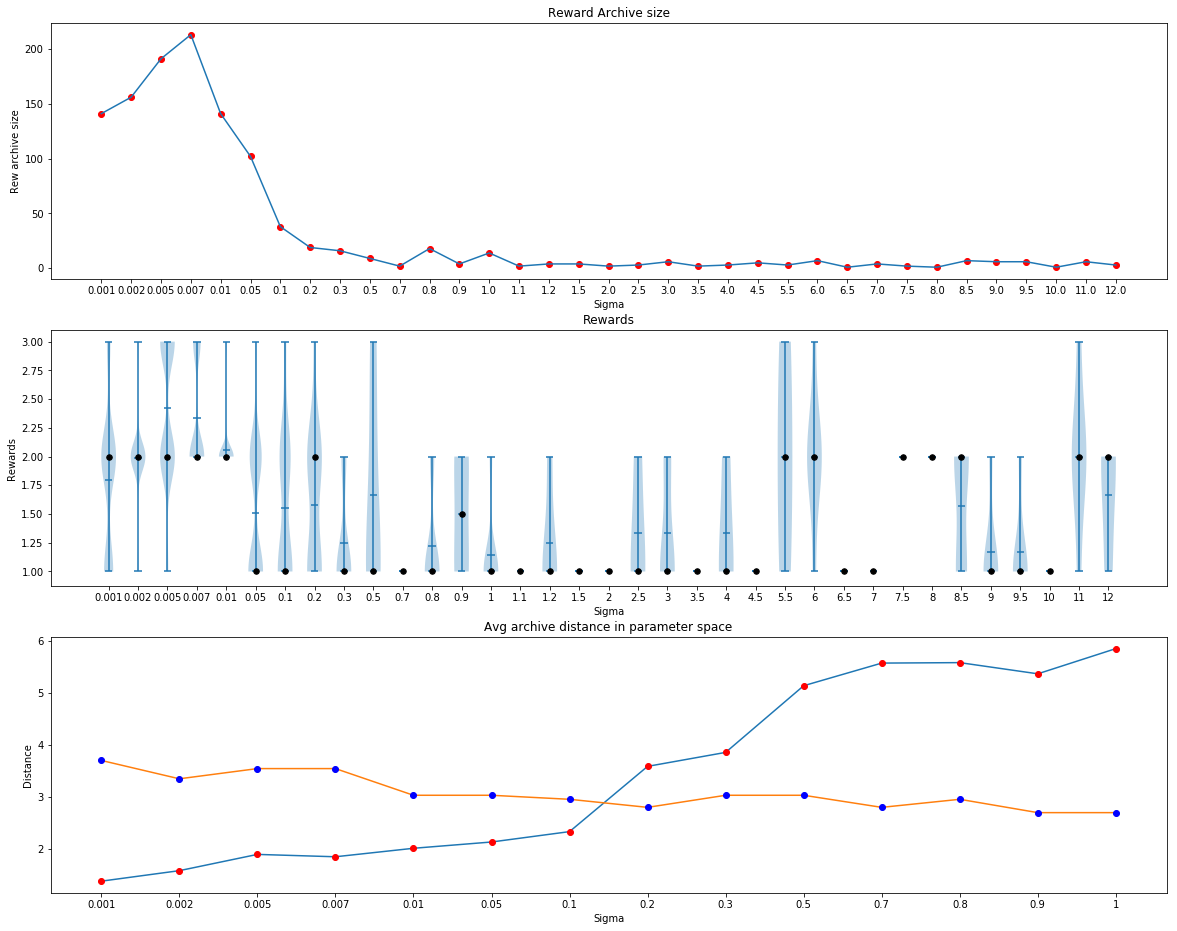

In [7]:
import matplotlib.pyplot as plt
figure, axes = plt.subplots(3,1, figsize=(20, 16))
axes[0].plot(list(range(len(rew_arch_size[:, 0]))), rew_arch_size[:, 1],'ro')
axes[0].plot(list(range(len(rew_arch_size[:, 0]))), rew_arch_size[:, 1])
axes[0].set_title('Reward Archive size')
axes[0].set_xticks(list(range(len(rew_arch_size[:, 0]))))
axes[0].set_xticklabels(rew_arch_size[:, 0])
axes[0].set_xlabel('Sigma')
axes[0].set_ylabel('Rew archive size')

axes[1].violinplot(rews[:, 1], positions=list(range(len(rews[:, 0]))), showmeans=True, showmedians=False,
        showextrema=True)
axes[1].scatter(list(range(len(rews[:, 0]))), [np.median(a) for a in rews[:, 1]], marker='o', color='black', s=30, zorder=3)
axes[1].set_xticks(list(range(len(rews[:, 0]))))
axes[1].set_xticklabels(rews[:, 0])
axes[1].set_title('Rewards')
axes[1].set_xlabel('Sigma')
axes[1].set_ylabel('Rewards')

limit_idx = np.where(genomes[:, 0] == 1)[0][0] + 1
axes[2].plot(list(range(len(rew_genomes[:limit_idx, 0]))), [np.mean(pdist(gen[1])) for gen in rew_genomes[:limit_idx]])
axes[2].plot(list(range(len(rew_genomes[:limit_idx, 0]))), [np.mean(pdist(gen[1])) for gen in rew_genomes[:limit_idx]], 'ro')
axes[2].set_title('Avg archive distance in parameter space')
axes[2].set_xticks(list(range(len(rew_genomes[:limit_idx, 0]))))
axes[2].set_xticklabels(rew_genomes[:limit_idx, 0])
axes[2].plot(list(range(len(genomes[:limit_idx, 0]))), [np.mean(pdist(gen[1])) for gen in genomes[:limit_idx]])
axes[2].plot(list(range(len(genomes[:limit_idx, 0]))), [np.mean(pdist(gen[1])) for gen in genomes[:limit_idx]], 'bo')
axes[2].set_xlabel('Sigma')
axes[2].set_ylabel('Distance')